<a href="https://colab.research.google.com/github/jtneumann/MLwork/blob/master/fastai/ml1/titanticTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q fastai==0.7.0

    100% |████████████████████████████████| 122kB 5.8MB/s 
    100% |████████████████████████████████| 496.4MB 31kB/s 
    100% |████████████████████████████████| 1.5MB 3.4MB/s 
    100% |████████████████████████████████| 3.6MB 4.1MB/s 
    100% |████████████████████████████████| 12.4MB 2.4MB/s 
    100% |████████████████████████████████| 61kB 18.7MB/s 
    100% |████████████████████████████████| 81kB 22.6MB/s 
mizani 0.5.3 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.


In [3]:

!pip install -q pandas==0.23.4

    100% |████████████████████████████████| 8.9MB 1.6MB/s 


In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [5]:
!ls

sample_data  train.csv


In [0]:
import pandas as pd
df_raw = pd.read_csv('train.csv', low_memory=False)

In [0]:
df_test = pd.read_csv('test.csv', low_memory=False)

In [8]:
df_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000):
        display(df)

In [10]:
display_all(df_raw.tail().T)

,886,887,888,889,890
PassengerId,887,888,889,890,891
Survived,0,1,0,1,0
Pclass,2,1,3,1,3
Name,"Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,male,male
Age,27,19,NaN,26,32
SibSp,0,0,1,0,0
Parch,0,0,2,0,0
Ticket,211536,112053,W./C. 6607,111369,370376
Fare,13,30,23.45,30,7.75


In [12]:
total = df_raw.isnull().sum().sort_values(ascending = False)
percent = round(df_raw.isnull().sum().sort_values(ascending = False)/len(df_raw)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [0]:
train_cats(df_raw)

In [0]:
train_cats(df_test)

In [15]:
df_raw.Sex.cat.categories

Index(['female', 'male'], dtype='object')

In [16]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Age            0.198653
Cabin          0.771044
Embarked       0.002245
Fare           0.000000
Name           0.000000
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Survived       0.000000
Ticket         0.000000
dtype: float64

In [0]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/titanic_raw')

In [0]:
import feather
df_raw = feather.read_dataframe('tmp/titanic_raw')

In [0]:
df, y, nas = proc_df(df_raw, 'Survived')

In [60]:
df, y, nas = proc_df(df_test, 'Survived')

KeyError: ignored

In [20]:

m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9031924072476272

In [21]:

def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 862  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((29, 12), (29,), (862, 12))

In [0]:

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [23]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 14.7 ms, sys: 3.06 ms, total: 17.7 ms
Wall time: 110 ms
[0.17120264258353668, 0.4853419872085701, 0.8826190476190476, -0.0004807225127894111]


In [0]:

df_trn, y_trn, nas = proc_df(df_raw, 'Survived', subset=300, na_dict=nas)
X_train, _ = split_vals(df_trn, 100)
y_train, _ = split_vals(y_trn, 100)

In [26]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 16 ms, sys: 5.14 ms, total: 21.1 ms
Wall time: 110 ms
[0.14899664425751338, 0.4046711018791133, 0.9047619047619048, 0.30446757552373616]


In [27]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.26599793600850424, 0.40944941832885573, 0.6964611670494023, 0.28794504334195714]


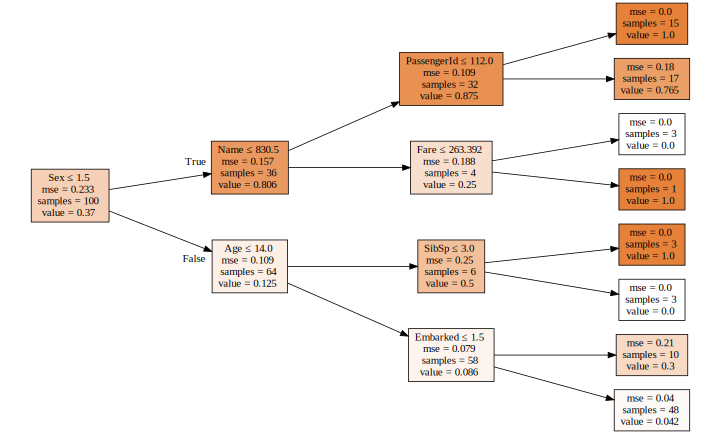

In [28]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [29]:

m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0, 0.4756239033604134, 1.0, 0.0391837434622313]


In [30]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.18330302779823357, 0.395156287915744, 0.8558558558558559, 0.33679041984623764]


In [31]:

preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0.0, 0)

In [32]:
preds.shape


(10, 862)

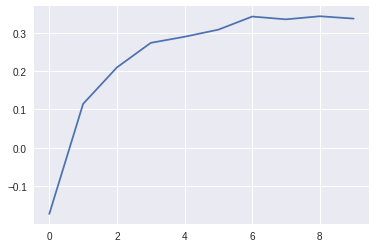

In [33]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [34]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.16007810593582122, 0.3826198006284393, 0.8900686400686401, 0.3782040641344424]


In [35]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.15662455107677087, 0.388613119454978, 0.8947608322608323, 0.35857200120037747]


In [36]:

m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.14260960696951663, 0.38339217410470594, 0.9127520377520377, 0.37569116007888215]


In [37]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14979152178945243, 0.38994392481632545, 0.9037430287430286, 0.35417133956386315, 0.36045991897962903]


In [0]:

df_trn, y_trn, nas = proc_df(df_raw, 'Survived')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [0]:
set_rf_samples(800)

In [40]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 19.3 ms, sys: 2.04 ms, total: 21.4 ms
Wall time: 112 ms
[0.0, 0.5445895024861362, 1.0, -0.2596547486352849, -1.0714285714285716]


In [41]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.0, 0.5398826889847731, 1.0, -0.23797479207750968, -1.0714285714285716]


In [0]:
reset_rf_samples()

In [0]:

def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [44]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.169685307107822, 0.43303949225924937, 0.8846904761904761, 0.20353259595873008, 0.11328192679620408]


In [0]:

t=m.estimators_[0].tree_

In [46]:
dectree_max_depth(t)

4

In [47]:

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2883421935787991, 0.4296650033124024, 0.66703920703439, 0.2158972812784128, 0.15977001866984797]


In [48]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.3075786187987099, 0.44427494278273827, 0.6211310749041681, 0.1616668567558246, 0.1278498255795545]


In [56]:
df_test = pd.read_csv('test.csv', low_memory=False)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
m_pred = m.predict(df_test)

ValueError: ignored